In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, glob, os, scipy.stats as stats
import neo
from convnwb.io import load_nwbfile


## 1. QuickSanity: Plot raw traces and check channel quality

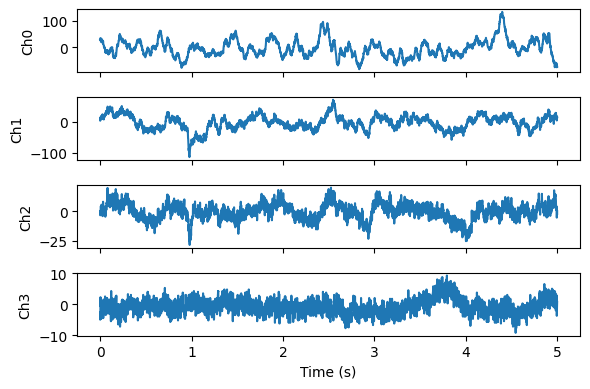

In [2]:
nev = glob.glob("../results/202509/*/*.nev")[0]

# 2) load the entire block, then take the first 5 s
blk       = neo.io.BlackrockIO(filename=nev).read_block(lazy=False)
lfp_full  = blk.segments[0].analogsignals[0]  # NS2 @ 2 kHz
sr        = lfp_full.sampling_rate.magnitude
n_samps   = int(5 * sr)
lfp       = lfp_full[:n_samps, :]             # first 5 s
t         = np.arange(n_samps) / sr

# 3) plot channels 0–3
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(6, 4))
for i, ax in enumerate(axs):
    ax.plot(t, lfp[:, i].magnitude)
    ax.set_ylabel(f"Ch{i}")
axs[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


## NEV

In [3]:
# create the reader and load the full block
reader = neo.io.BlackrockIO(filename=glob.glob("../results/202509/*/*.nev")[0])
blk = reader.read_block(lazy=False)
print(blk.annotations)
print(blk.segments)
# print(blk.recordingchannelgroups)
seg = blk.segments[0]
seg

{'avail_file_set': ['ns2', 'ns5', 'nev'], 'avail_nsx': [2, 5], 'avail_nev': True, 'rec_pauses': False}


Segment with [<AnalogSignal(array([[ 27.25,   8.5 ,  -1.75, ...,   9.25,  27.25,  56.75],
       [ 26.25,   2.75,  -3.25, ...,   2.5 ,  20.5 ,  70.5 ],
       [ 27.75,   4.25,  -2.75, ...,  -9.5 ,   6.  ,  64.5 ],
       ...,
       [ -2.75,  40.25,  -5.5 , ...,  63.  , -61.25, -38.25],
       [ -1.75,  39.75,  -4.25, ...,  59.  , -49.75, -48.  ],
       [ -3.  ,  40.  ,  -4.25, ...,  15.5 , -51.  , -88.  ]],
      dtype=float32) * uV, [0.0 s, 1610.569 s], sampling rate: 1000.0 Hz)>, <AnalogSignal(array([[ 2.8992584 , -1.5259255 ,  0.45777765, -2.4414809 ],
       [ 2.8992584 , -1.5259255 ,  0.45777765, -2.4414809 ],
       [ 2.746666  , -1.5259255 ,  0.3051851 , -2.4414809 ],
       ...,
       [ 2.746666  , -1.8311106 ,  0.3051851 , -2.5940733 ],
       [ 2.8992584 , -1.678518  ,  0.3051851 , -2.5940733 ],
       [ 2.8992584 , -1.5259255 ,  0.3051851 , -2.5940733 ]],
      dtype=float32) * mV, [0.0 s, 1610.569 s], sampling rate: 1000.0 Hz)>, <AnalogSignal(array([[ 1.01931824e+02,  4.

In [4]:
print("Analog streams:", [a.name for a in seg.analogsignals])
print("SpikeTrains:", seg.spiketrains)
print("Events:", [e.name for e in seg.events])
print("Segment meta:", seg.annotations)


Analog streams: ['Channels: (chan1 chan2 chan3 chan4 chan5 chan6 chan7 chan8 chan9 chan10 chan11 chan12 chan13 chan14 chan15 chan16 chan17 chan18 chan19 chan20 chan21 chan22 chan23 chan24 chan25 chan26 chan27 chan28 chan29 chan30 chan31 chan32 chan33 chan34 chan35 chan36 chan37 chan38 chan39 chan40 chan41 chan42 chan43 chan44 chan45 chan46 chan47 chan48 chan49 chan50 chan51 chan52 chan53 chan54 chan55 chan56 chan57 chan58 chan59 chan60 chan61 chan62 chan63 chan64 chan65 chan66 chan67 chan68 chan69 chan70 chan71 chan72 chan73 chan74 chan75 chan76 chan77 chan78 chan79 chan80 chan81 chan82 chan83 chan84 chan85 chan86 chan87 chan88 chan89 chan90 chan91 chan92 chan93 chan94 chan95 chan96 chan97 chan98 chan99 chan100 chan101 chan102 chan103 chan104 chan105 chan106 chan107 chan108 chan109 chan110 chan111 chan112 chan113 chan114 chan115 chan116 chan117 chan118 chan119 chan120 chan121 chan122 chan123 chan124 chan125 chan126 chan127 chan128)', 'Channels: (EyeX EyeY Pupil BP)', np.str_('nsx5')]
S

In [5]:
# list all event names and print the first few timestamps
for event in seg.events:
    times = event.times.rescale('s').magnitude  # in seconds
    print(f"{event.name}: {times[:10]}")  # first 10 event times

digital_input_port: [37.26826667 45.85056667 46.8353     47.82956667 49.2637     50.07953333
 50.07963333 50.42956667 50.49616667 50.77953333]
serial_input_port: []
comments: []


In [6]:
sess_file = glob.glob('../results/202509/*/*.nev')[0]
nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
nwbfile


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../results/202509/20250523-141833/20250523-141833-002.nev.nwb', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import glob, neo

# 1) Find one .nev file under ../results/202509/*/
nev_list = glob.glob("../results/202509/*/*.nev")
if not nev_list:
    raise FileNotFoundError("No .nev file found under ../results/202509/*/")
nev_file = nev_list[0]
print("Loading NEV:", nev_file)

# 2) Open it with Neo’s BlackrockIO
reader = neo.io.BlackrockIO(filename=nev_file)

# 3) Read everything in (no time slicing)
blk = reader.read_block(lazy=False)
seg = blk.segments[0]


Loading NEV: ../results/202509/20250523-141833/20250523-141833-002.nev


In [16]:
print("=== EVENT CHANNELS & COUNTS ===")
for ev in seg.events:
    count = len(ev.times)
    print(f"{ev.name:20s}  {count:5d} timestamps")


=== EVENT CHANNELS & COUNTS ===
digital_input_port     2522 timestamps
serial_input_port         0 timestamps
comments                  0 timestamps


In [19]:
# 4) Pick the channel named “DIN0” (adjust if yours is different)
ev_obj = [ev for ev in seg.events if "digital_input_port" in ev.name][0]
times_sec = ev_obj.times.rescale("s").magnitude  # convert to seconds
print("First 5 digital_input_port times (s):", times_sec[:5])


First 5 digital_input_port times (s): [37.26826667 45.85056667 46.8353     47.82956667 49.2637    ]
